**IMPORTING DATASETS AND LIBRARIES**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
# load data
data_churn = pd.read_csv('/content/churn.csv', sep='\s;\s*', engine='python')
data_entry = pd.read_csv('/content/ent.csv', sep='\s;\s*', engine='python')
data_bugs = pd.read_csv('/content/bug-metrics.csv', sep='\s;\s*', engine='python')
data_change = pd.read_csv('/content/change-metrics.csv', sep='\s;\s*', engine='python')
data_complexity_change = pd.read_csv('/content/complexity-code-change.csv', sep='\s;\s*', engine='python')
data_single_version_ck_oo = pd.read_csv('/content/single-version-ck-oo.csv', sep='\s;\s*', engine='python')

data = data_churn.merge(data_entry, how='left')\
        .merge(data_bugs, how='left')\
        .merge(data_change, how='left')\
        .merge(data_complexity_change, how='left')\
        .merge(data_single_version_ck_oo, how='left')


def remove_unnamed_cols(data):
    return data.loc[:, ~data.columns.str.contains('^Unnamed')]


# merge data
data = data_churn.merge(data_entry, how='left')\
        .merge(data_bugs, how='left')\
        .merge(data_change, how='left')\
        .merge(data_complexity_change, how='left')\
        .merge(data_single_version_ck_oo, how='left')

#remove unnamed columns
data = remove_unnamed_cols(data)

# add defect column
data['defect'] = data['bugs'] > 0

data

<ipython-input-4-b35cac13740c>:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  data = data_churn.merge(data_entry, how='left')\
<ipython-input-4-b35cac13740c>:21: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  data = data_churn.merge(data_entry, how='left')\


,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,maxCodeChurnUntil:,avgCodeChurnUntil:,ageWithRespectTo:,weightedAgeWithRespectTo:,CvsEntropy,CvsWEntropy,CvsLinEntropy,CvsLogEntropy,CvsExpEntropy,defect
0,org::eclipse::jdt::internal::core::search::ind...,0,0,0,0,0,0,0,0,6.0,...,15.0,0.646154,350.5710,63.0609,10.91310,0.008302,0.014767,0.253257,0.001125,False
1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,0,0,0,0.0,...,10.0,5.000000,117.7140,0.0000,1.10349,0.000657,0.001886,0.027116,0.000351,False
2,org::eclipse::jdt::internal::compiler::ast::AS...,14,2,12,4,19,0,37,128,261.0,...,66.0,4.941670,238.4290,104.2040,37.86060,0.228509,0.106180,1.028400,0.210412,True
3,org::eclipse::jdt::internal::compiler::lookup:...,3,2,0,3,4,0,0,412,25.0,...,23.0,0.535714,367.0000,112.6780,5.86013,0.009105,0.010113,0.143680,0.003485,False
4,org::eclipse::jdt::internal::eval::CodeSnippet...,0,2,0,0,117,0,1,108,26.0,...,18.0,-0.118280,367.0000,54.9702,13.59600,0.016005,0.025751,0.338602,0.021378,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,org::eclipse::pde::internal::ui::editor::text:...,0,0,0,0,0,0,0,0,0.0,...,10.0,-1.750000,118.0000,46.5604,4.50348,0.011520,0.016779,0.135081,0.040448,False
5367,org::eclipse::pde::internal::core::builders::E...,0,0,0,0,0,0,0,0,1.0,...,10.0,1.400000,133.5710,47.2612,6.02143,0.011071,0.019695,0.173420,0.042086,False
5368,org::eclipse::pde::internal::core::builders::D...,2,0,0,2,0,0,0,0,1.0,...,57.0,6.625000,335.2860,203.3320,7.61847,0.024371,0.022007,0.211703,0.039724,False
5369,org::eclipse::pde::internal::ui::templates::id...,0,0,0,0,0,0,0,0,0.0,...,1.0,0.500000,95.5714,58.5714,1.56044,0.000499,0.008031,0.052586,0.024708,False


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from tqdm import tqdm

## EDA

* import some dependencies to plot
* use plotly to visualization
    * label classification
        * count and plot(visualization)
    * value visualization
        * use historgram to visualization attribution
        * relationship
            * covariance
            * heatmap
    * scatter

In [6]:
# import some dependencies for plotting

from plotly.offline import iplot
import plotly.graph_objs as go

In [7]:
# check data
def show_info(data, is_matrix_transpose=False):
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
    print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', data.describe().T)
        print('data demo without matrix transpose: ', data.head().T)
    else:
        print('data value analysis: ', data.describe())
        print('data demo without matrix transpose: ', data.head())

show_info(data)

data shape is: (5371, 49)   sample number 5371   attribute number 49

data columns number 49  
all columns: Index(['classname', 'cbo', 'dit', 'fanIn', 'fanOut', 'lcom', 'noc',
       'numberOfAttributes', 'numberOfAttributesInherited',
       'numberOfLinesOfCode', 'numberOfMethods', 'numberOfMethodsInherited',
       'numberOfPrivateAttributes', 'numberOfPrivateMethods',
       'numberOfPublicAttributes', 'numberOfPublicMethods', 'rfc', 'wmc',
       'bugs', 'nonTrivialBugs', 'majorBugs', 'criticalBugs',
       'highPriorityBugs', 'numberOfBugsFoundUntil:',
       'numberOfNonTrivialBugsFoundUntil:', 'numberOfMajorBugsFoundUntil:',
       'numberOfCriticalBugsFoundUntil:',
       'numberOfHighPriorityBugsFoundUntil:', 'numberOfVersionsUntil:',
       'numberOfFixesUntil:', 'numberOfRefactoringsUntil:',
       'numberOfAuthorsUntil:', 'linesAddedUntil:', 'maxLinesAddedUntil:',
       'avgLinesAddedUntil:', 'linesRemovedUntil:', 'maxLinesRemovedUntil:',
       'avgLinesRemovedUntil:', '

<Axes: >

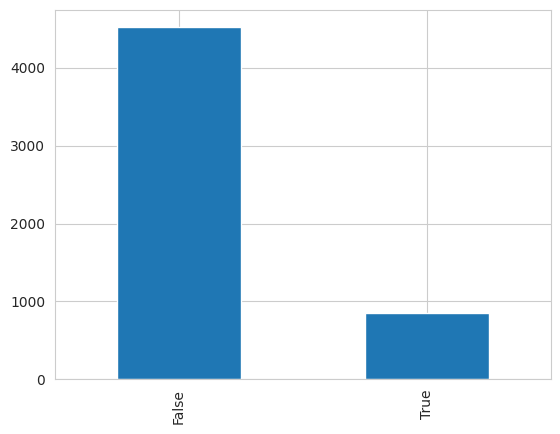

In [8]:
# label classification
data['defect'].value_counts().plot.bar()

In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,maxCodeChurnUntil:,avgCodeChurnUntil:,ageWithRespectTo:,weightedAgeWithRespectTo:,CvsEntropy,CvsWEntropy,CvsLinEntropy,CvsLogEntropy,CvsExpEntropy,defect
cbo,1.000000,0.035233,0.933357,0.557145,0.166317,0.188841,0.056084,0.017822,0.347392,0.418696,...,0.228438,0.064187,0.144091,0.208346,0.404418,0.349864,0.214707,0.097432,0.255337,0.186688
dit,0.035233,1.000000,0.000507,0.103724,0.031666,-0.006230,0.011430,0.692571,0.108146,0.103156,...,0.090138,-0.021707,0.262915,0.143669,0.248731,0.073899,0.092957,0.065730,0.072452,0.070919
fanIn,0.933357,0.000507,1.000000,0.234934,0.119034,0.210581,0.038859,0.018481,0.191911,0.271077,...,0.126307,0.034808,0.111637,0.173898,0.229857,0.232140,0.128918,0.054238,0.157843,0.111516
fanOut,0.557145,0.103724,0.234934,1.000000,0.202514,0.022332,0.069263,0.018450,0.542502,0.554598,...,0.350502,0.094761,0.137886,0.170510,0.596501,0.473875,0.303978,0.147454,0.352024,0.272658
lcom,0.166317,0.031666,0.119034,0.202514,1.000000,0.025038,0.036231,0.063001,0.537017,0.754292,...,0.221036,0.027202,0.063641,0.077373,0.205404,0.305561,0.085694,0.033506,0.096066,0.118456
noc,0.188841,-0.006230,0.210581,0.022332,0.025038,1.000000,0.002983,-0.005546,0.036516,0.075599,...,0.026679,0.014450,0.065618,0.111496,0.063902,0.051269,0.023873,0.001952,0.031716,0.008736
numberOfAttributes,0.056084,0.011430,0.038859,0.069263,0.036231,0.002983,1.000000,0.001374,0.085556,0.079413,...,0.067623,0.015295,0.030947,0.041086,0.182797,0.132816,0.076798,0.020745,0.093553,0.086060
numberOfAttributesInherited,0.017822,0.692571,0.018481,0.018450,0.063001,-0.005546,0.001374,1.000000,0.130916,0.055343,...,0.093529,-0.008226,0.323271,0.162036,0.262924,0.053745,0.070840,0.054637,0.035601,0.094074
numberOfLinesOfCode,0.347392,0.108146,0.191911,0.542502,0.537017,0.036516,0.085556,0.130916,1.000000,0.719858,...,0.547588,0.180820,0.160104,0.180768,0.507392,0.630850,0.224323,0.093433,0.253366,0.256199
numberOfMethods,0.418696,0.103156,0.271077,0.554598,0.754292,0.075599,0.079413,0.055343,0.719858,1.000000,...,0.378413,0.109877,0.133889,0.179411,0.445609,0.519664,0.179879,0.058594,0.211212,0.234609


In [10]:
# plot columns distribution
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


<ipython-input-11-c862859e6656>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

<ipython-input-11-c862859e6656>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



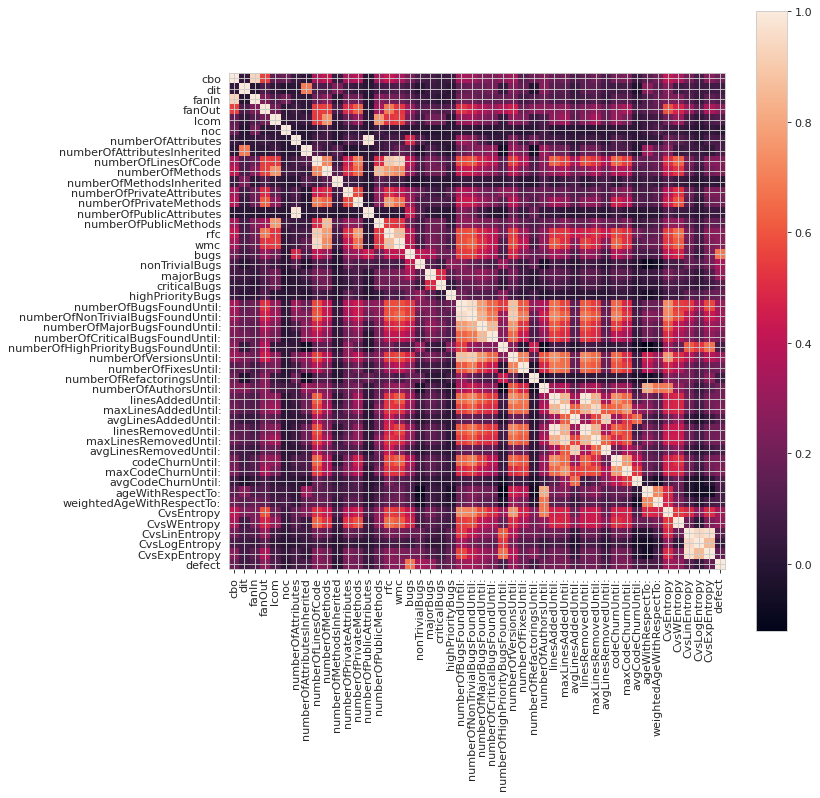

In [11]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(data, 10)

<ipython-input-12-94136f4651fb>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



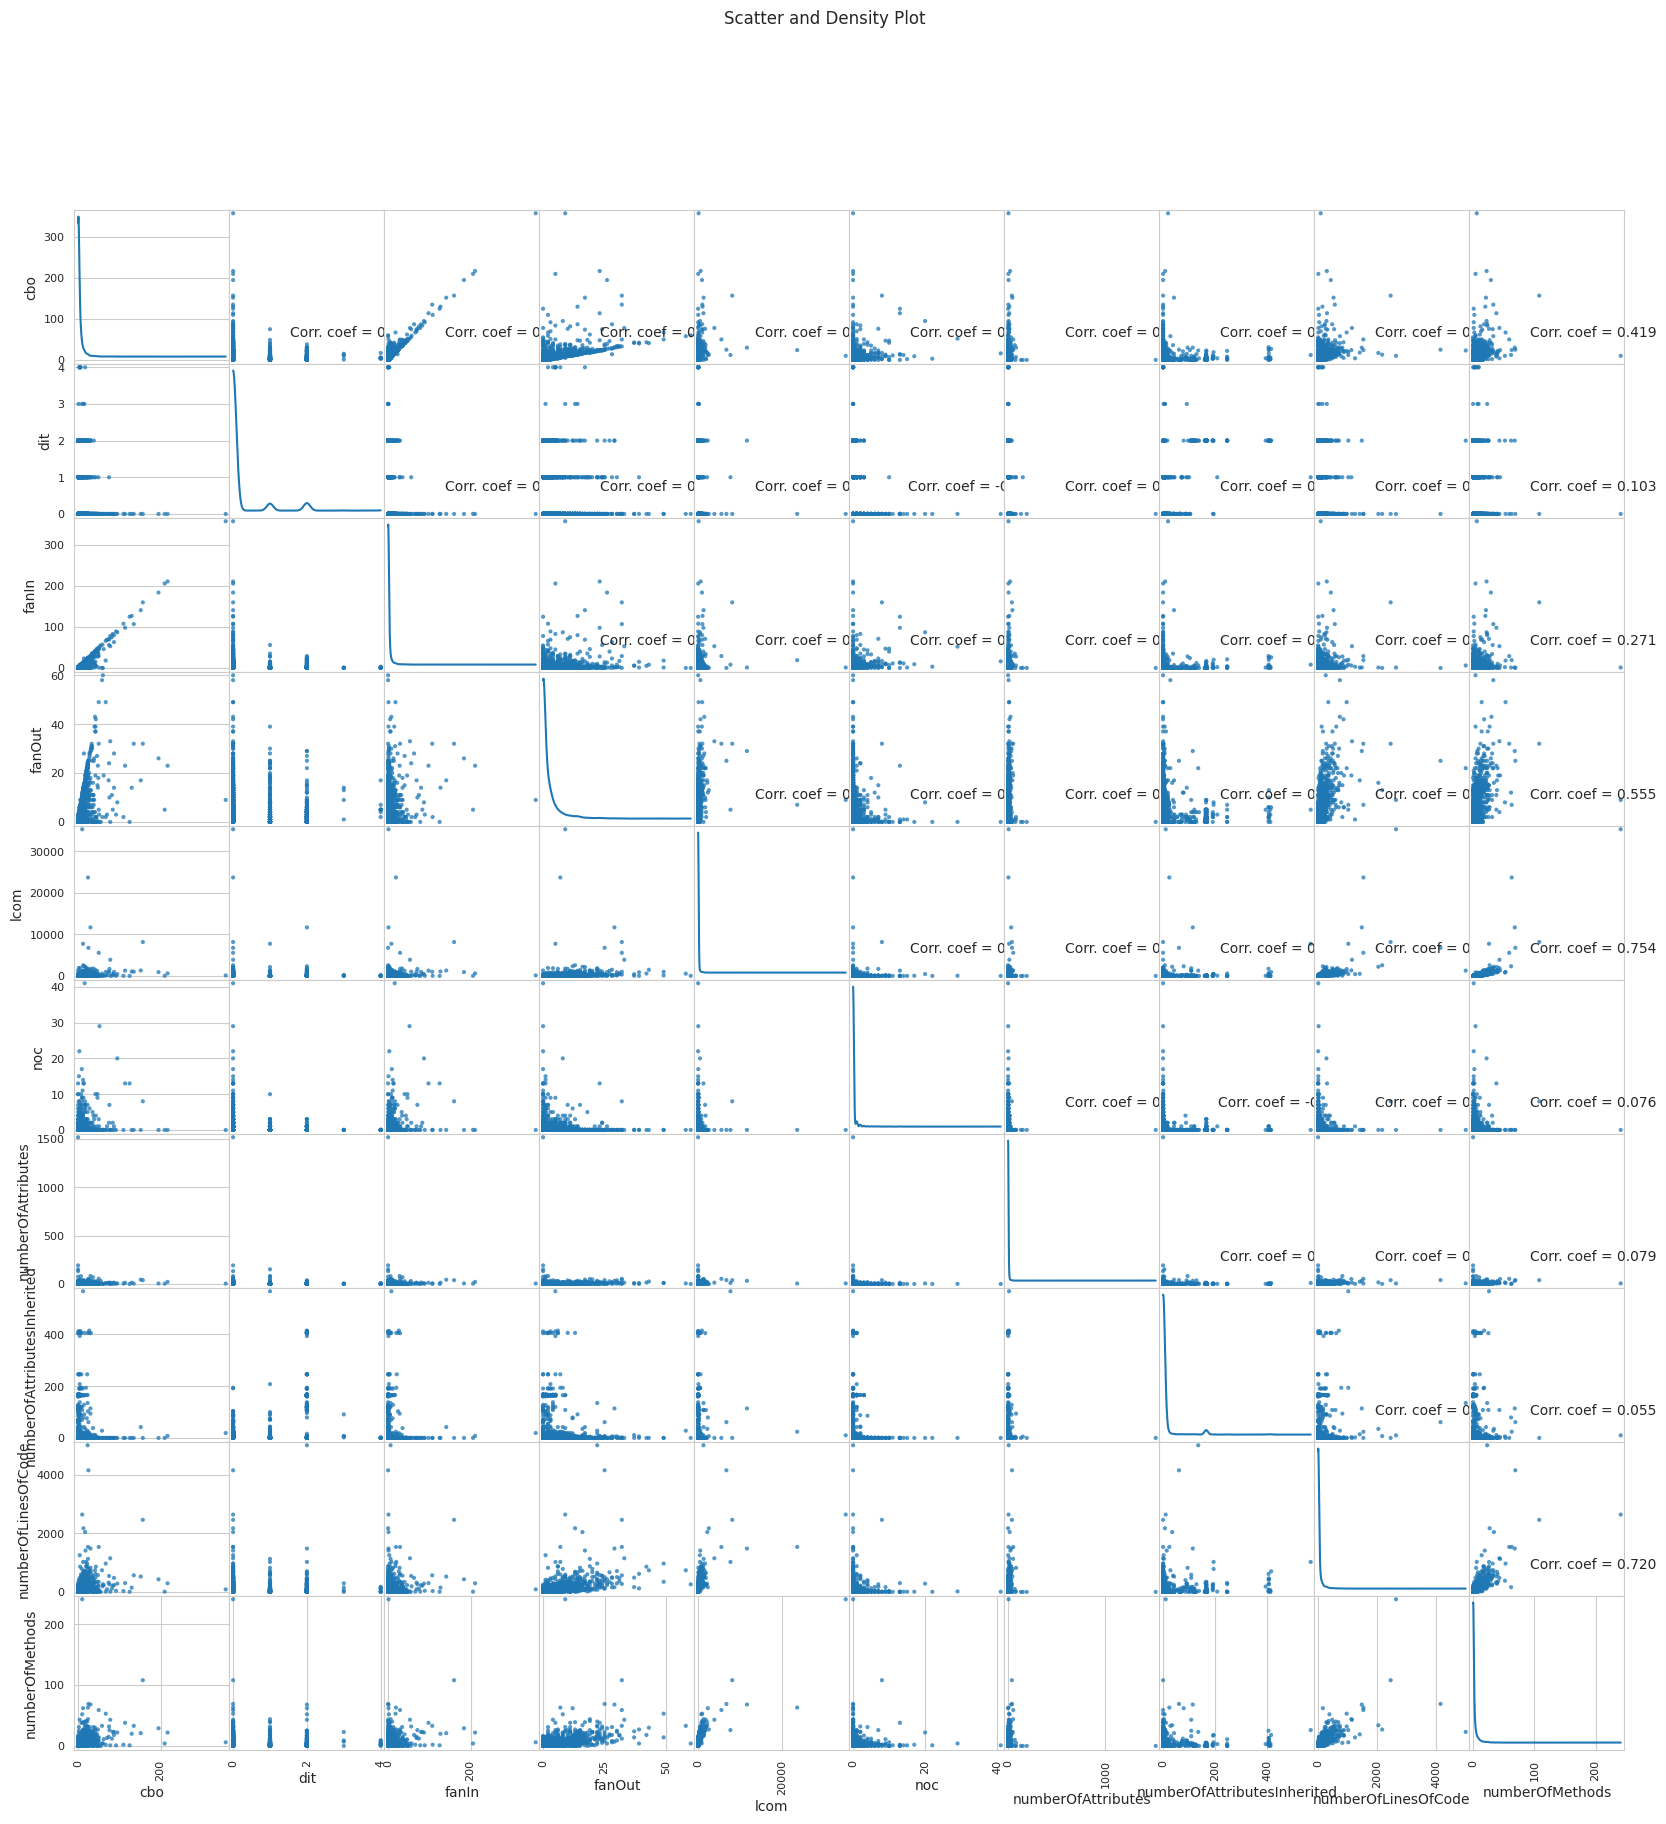

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(data, 20, 10)

## Data cleaning
* fillna
* remove outliars (by use boxplot to visualization)

In [13]:
data['bugs']
trace1 = go.Box(x=data['cbo'])
box_data = [trace1]
iplot(box_data)

**NORMALIZATION**

In [14]:
from sklearn import preprocessing

In [15]:
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d

In [16]:
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d

In [17]:
X = data[data.columns.difference(['defect', 'classname'])]
d=change(X)
a=change(X)
X['bugs'] = (X['bugs']+a)*d
y = data['defect']
preprocessing.scale(X)
show_info(X)

data shape is: (5371, 47)   sample number 5371   attribute number 47

data columns number 47  
all columns: Index(['CvsEntropy', 'CvsExpEntropy', 'CvsLinEntropy', 'CvsLogEntropy',
       'CvsWEntropy', 'ageWithRespectTo:', 'avgCodeChurnUntil:',
       'avgLinesAddedUntil:', 'avgLinesRemovedUntil:', 'bugs', 'cbo',
       'codeChurnUntil:', 'criticalBugs', 'dit', 'fanIn', 'fanOut',
       'highPriorityBugs', 'lcom', 'linesAddedUntil:', 'linesRemovedUntil:',
       'majorBugs', 'maxCodeChurnUntil:', 'maxLinesAddedUntil:',
       'maxLinesRemovedUntil:', 'noc', 'nonTrivialBugs', 'numberOfAttributes',
       'numberOfAttributesInherited', 'numberOfAuthorsUntil:',
       'numberOfBugsFoundUntil:', 'numberOfCriticalBugsFoundUntil:',
       'numberOfFixesUntil:', 'numberOfHighPriorityBugsFoundUntil:',
       'numberOfLinesOfCode', 'numberOfMajorBugsFoundUntil:',
       'numberOfMethods', 'numberOfMethodsInherited',
       'numberOfNonTrivialBugsFoundUntil:', 'numberOfPrivateAttributes',
      

<ipython-input-17-42061a1c27ef>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**SMOTE-TOMEK**

In [18]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [19]:
pip install imblearn

In [20]:
pip install seaborn

In [21]:
from sklearn.preprocessing import LabelEncoder
# Choose the column you want to convert (e.g., 'classname')
column_name = 'classname'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the selected column to integer labels
data[column_name] = label_encoder.fit_transform(data[column_name])

# Convert the integer labels to float
data[column_name] = data[column_name].astype(float)


In [22]:
# data prepare -- train test split

from sklearn.model_selection import train_test_split
# hyper-parameter
validation_size = 0.2
random_seed=8

X = data.iloc[:, 0:47]
y = data.iloc[:, 48]
X_train, X_val, y_train, y_val = train_test_split(
    X.values,
    y.values,
    test_size=validation_size,
    random_state=random_seed
    )
X_train.shape, X_val.shape, y_train.shape, y_val.shape



((4296, 47), (1075, 47), (4296,), (1075,))

In [23]:
X_train

array([[4.71800e+03, 0.00000e+00, 0.00000e+00, ..., 9.80191e-03,
        1.85353e-02, 1.36860e-01],
       [1.38000e+02, 2.00000e+00, 0.00000e+00, ..., 8.73984e-04,
        5.35961e-02, 1.70881e-01],
       [1.43200e+03, 1.10000e+01, 0.00000e+00, ..., 8.46606e-02,
        1.67331e-01, 8.53730e+00],
       ...,
       [3.06000e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.88000e+02, 0.00000e+00, 0.00000e+00, ..., 1.81519e-03,
        6.45093e-03, 3.93921e-02],
       [4.74800e+03, 3.00000e+00, 0.00000e+00, ..., 1.47213e-01,
        6.42199e-02, 4.46990e-01]])

In [24]:
data

,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,maxCodeChurnUntil:,avgCodeChurnUntil:,ageWithRespectTo:,weightedAgeWithRespectTo:,CvsEntropy,CvsWEntropy,CvsLinEntropy,CvsLogEntropy,CvsExpEntropy,defect
0,1562.0,0,0,0,0,0,0,0,0,6.0,...,15.0,0.646154,350.5710,63.0609,10.91310,0.008302,0.014767,0.253257,0.001125,False
1,1172.0,0,0,0,0,0,0,0,0,0.0,...,10.0,5.000000,117.7140,0.0000,1.10349,0.000657,0.001886,0.027116,0.000351,False
2,1043.0,14,2,12,4,19,0,37,128,261.0,...,66.0,4.941670,238.4290,104.2040,37.86060,0.228509,0.106180,1.028400,0.210412,True
3,1237.0,3,2,0,3,4,0,0,412,25.0,...,23.0,0.535714,367.0000,112.6780,5.86013,0.009105,0.010113,0.143680,0.003485,False
4,1694.0,0,2,0,0,117,0,1,108,26.0,...,18.0,-0.118280,367.0000,54.9702,13.59600,0.016005,0.025751,0.338602,0.021378,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,4673.0,0,0,0,0,0,0,0,0,0.0,...,10.0,-1.750000,118.0000,46.5604,4.50348,0.011520,0.016779,0.135081,0.040448,False
5367,3869.0,0,0,0,0,0,0,0,0,1.0,...,10.0,1.400000,133.5710,47.2612,6.02143,0.011071,0.019695,0.173420,0.042086,False
5368,3866.0,2,0,0,2,0,0,0,0,1.0,...,57.0,6.625000,335.2860,203.3320,7.61847,0.024371,0.022007,0.211703,0.039724,False
5369,4914.0,0,0,0,0,0,0,0,0,0.0,...,1.0,0.500000,95.5714,58.5714,1.56044,0.000499,0.008031,0.052586,0.024708,False


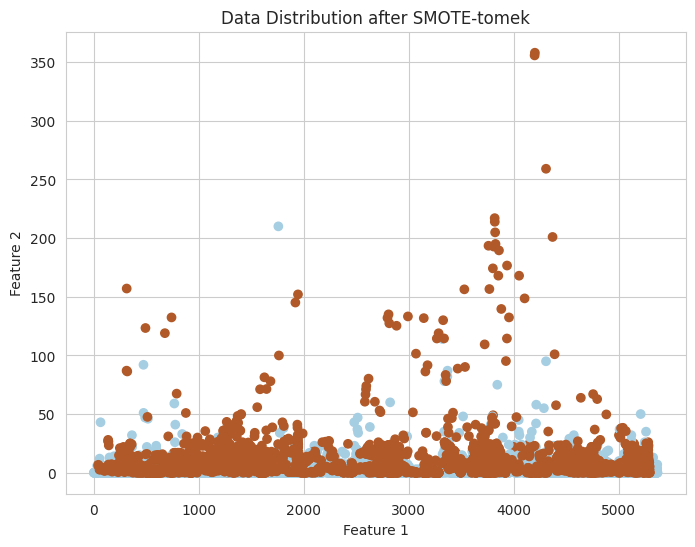

In [25]:
from imblearn.combine import SMOTETomek


smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Visualize the data distribution after applying SMOTE
plt.figure(figsize=(8, 6))
plt.scatter(X_train_resampled[:, 0], X_train_resampled[:, 1], c=y_train_resampled, cmap=plt.cm.Paired, marker='o')
plt.title("Data Distribution after SMOTE-tomek")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**KNN**

In [26]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [28]:
validation_size = 0.2
random_seed=8

X = data.iloc[:, 0:47]
y = data.iloc[:, 48]
X_train, X_val, y_train, y_val = train_test_split(
    X.values,
    y.values,
    test_size=validation_size,
    random_state=random_seed
    )

#x=X_train_resampled[2:47]
sc_X = StandardScaler() #data between 1 to -1
X_train = sc_X.fit_transform(X_train_resampled)
X_test = sc_X.transform(X_val)


In [29]:
import math
math.sqrt(len(y_val))

32.78719262151

In [30]:
#Define the model
knn_model = KNeighborsClassifier (n_neighbors=31, p=2, metric='euclidean')

#fit model
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=31)

In [31]:
# Predict the test set results
knn_pred = knn_model.predict(X_val)
y_pred = knn_model.predict(X_val)
y_pred

array([False,  True,  True, ...,  True, False, False])

In [32]:
# Evaluate Model
cm = confusion_matrix(y_val, y_pred)
print (cm)


[[648 249]
 [ 66 112]]


In [33]:
print(accuracy_score(y_val, y_pred))

0.7069767441860465


In [34]:

knn_pred = knn_model.predict(X_test)

**DECISION TREE**

In [35]:
#import the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [36]:
X = data.iloc[:, 0:47]
y = data.iloc[:, 48]
X_train, X_val, y_train, y_val = train_test_split(
    X.values,
    y.values,
    test_size=validation_size,
    random_state=random_seed
)

feature_names = X_train
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)

Accuracy: 1.00


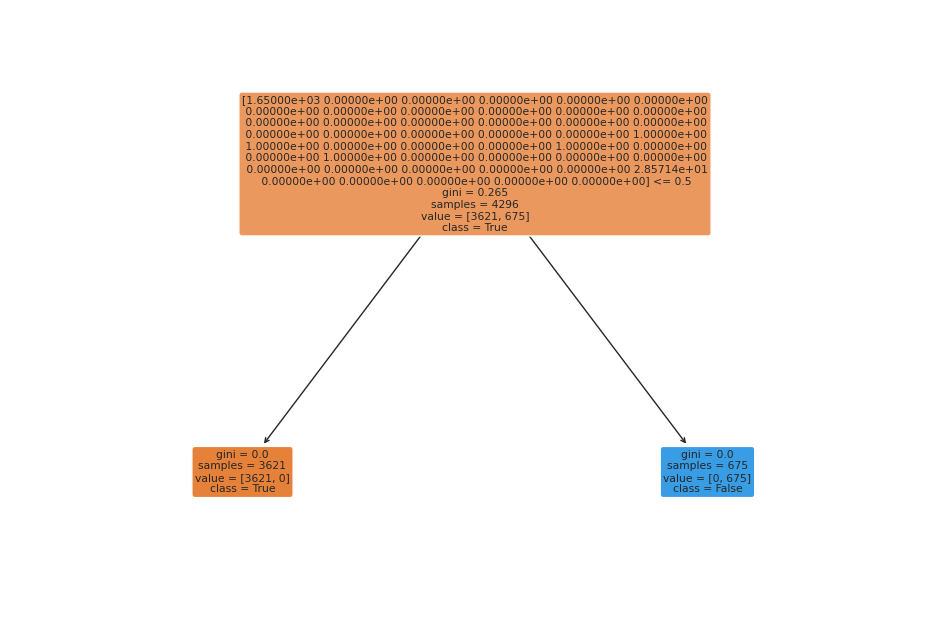

In [38]:
# Make predictions on the test set
y_pred = dt_model.predict(X_val)

# Calculate and print the accuracy of the classifier on the test set
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=['True','False'], filled=True, rounded=True)
plt.show()

In [39]:
#function to perform training with entropy
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model= dt_model.fit(X_train_resampled, y_train_resampled)

In [40]:
y_pred_en = dt_model.predict(X_val)
y_pred_en

array([False,  True, False, ..., False, False, False])

In [41]:
print ("Accuracy is "),metrics.accuracy_score(y_val,y_pred_en)*100
#print("accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is 


(None, 100.0)

[Text(0.5, 0.75, 'x[18] <= 0.5\nentropy = 1.0\nsamples = 7114\nvalue = [3557, 3557]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3557\nvalue = [3557, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3557\nvalue = [0, 3557]')]

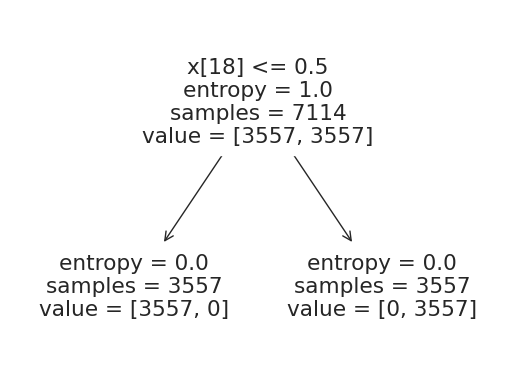

In [42]:
from sklearn import tree
tree.plot_tree(dt_model)

**SVM**

In [43]:
from sklearn.svm import SVC
svm_model = SVC()

In [44]:
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [45]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)

In [46]:
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 1.0


In [47]:
svm_model.score(X_val, y_val)

0.8520930232558139

In [48]:
svm_model.predict(X_val)

array([False, False, False, ..., False, False, False])

In [49]:
#Tune parameters
#1. Regularization (C)
svm_model_C = SVC(C=1)
svm_model_C.fit(X_train_resampled, y_train_resampled)
svm_model_C.score(X_val, y_val)

0.813953488372093

In [50]:
svm_model_C = SVC(C=10)
svm_model_C.fit(X_train_resampled, y_train_resampled)
svm_model_C.score(X_val, y_val)

0.7879069767441861

**NAIVE**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [52]:
from sklearn.naive_bayes import GaussianNB

# Assuming X contains numerical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_val)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Accuracy:", accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       897
        True       0.83      1.00      0.91       178

    accuracy                           0.97      1075
   macro avg       0.91      0.98      0.94      1075
weighted avg       0.97      0.97      0.97      1075

Accuracy: 0.9655813953488372


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [53]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



**GENETIC ALGORITHM BASED ON ARTIFICAL NEURAL NETWORK (GA-ANN)**

In [54]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.4 MB/s eta 0:00:00


In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define genetic algorithm parameters
population_size = 10
num_generations = 5
mutation_rate = 0.1

# Function to create a simple feedforward neural network
def create_neural_network():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to initialize a random population of neural networks
def initialize_population(population_size):
    return [create_neural_network() for _ in range(population_size)]

# Function to evaluate the fitness of each neural network in the population
def evaluate_population(population, X_train, y_train, X_test, y_test):
    fitness_scores = []
    for model in population:
        model.fit(X_train, y_train, epochs=5, verbose=0)
        predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_test, predictions)
        fitness_scores.append(accuracy)
    return fitness_scores

# Function for tournament selection
def tournament_selection(fitness_scores, tournament_size):
    selected_indices = []
    for _ in range(len(fitness_scores)):
        tournament_indices = np.random.choice(len(fitness_scores), tournament_size, replace=False)
        winner_index = max(tournament_indices, key=lambda i: fitness_scores[i])
        selected_indices.append(winner_index)
    return selected_indices

# Function for one-point crossover
def crossover(parent1, parent2):
    child1 = create_neural_network()
    child2 = create_neural_network()

    for layer in range(len(child1.layers)):
        crossover_point = np.random.randint(0, 2)
        if crossover_point == 0:
            child1.layers[layer].set_weights(parent1.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent2.layers[layer].get_weights())
        else:
            child1.layers[layer].set_weights(parent2.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent1.layers[layer].get_weights())

    return child1, child2

# Function for mutation
def mutate(model, mutation_rate):
    for layer in range(len(model.layers)):
        if np.random.rand() < mutation_rate:
            new_weights = [w + np.random.normal(0, 0.1, w.shape) for w in model.layers[layer].get_weights()]
            model.layers[layer].set_weights(new_weights)
    return model

# Main genetic algorithm loop
population = initialize_population(population_size)

# Lists to store evolution data
gen_numbers = []
max_accuracies = []

for generation in range(num_generations):
    fitness_scores = evaluate_population(population, X_train, y_train, X_test, y_test)

    # Select parents using tournament selection
    selected_indices = tournament_selection(fitness_scores, tournament_size=2)

    # Create new generation using crossover and mutation
    new_population = []
    for i in range(0, len(selected_indices), 2):
        parent1 = population[selected_indices[i]]
        parent2 = population[selected_indices[i + 1]]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        new_population.extend([child1, child2])

    population = new_population

    # Collect evolution data
    best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
    max_accuracy = accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten())

    gen_numbers.append(generation)
    max_accuracies.append(max_accuracy)



34/34 [==============================] - 0s 2ms/step


In [56]:
# Select the best neural network from the final population
best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
print("Best Neural Network Accuracy:", accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten()))

34/34 [==============================] - 0s 3ms/step
Best Neural Network Accuracy: 0.9646511627906976


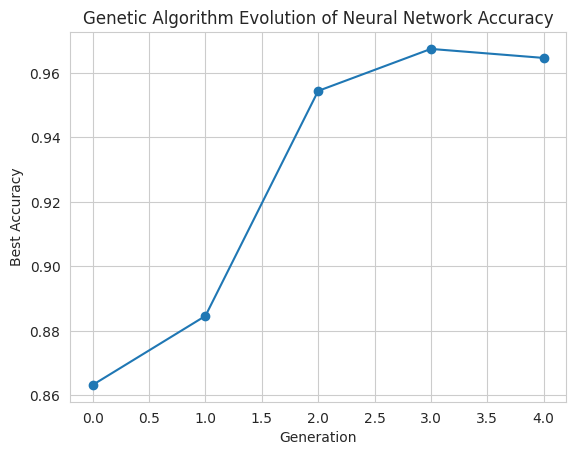

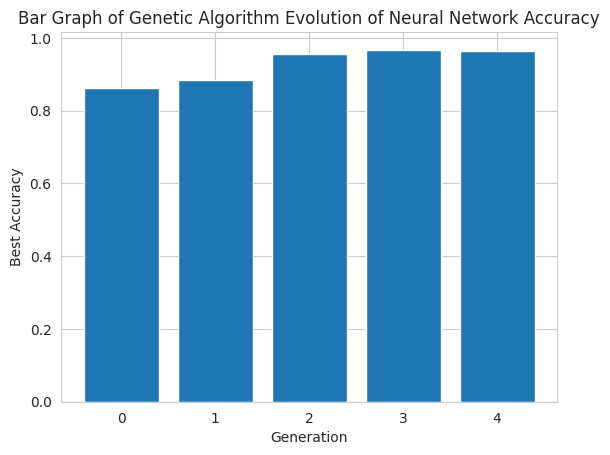

In [57]:
# Plot the evolution of accuracy
plt.plot(gen_numbers, max_accuracies, marker='o')
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

# Plot bar graph for accuracy
plt.bar(range(len(max_accuracies)), max_accuracies)
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Bar Graph of Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

**EVALUATING OTHER ALGORITHMS**

Model: Decision Tree
Accuracy: 0.7386
Confusion Matrix:
[[766 150]
 [131  28]]

Model: KNN
Accuracy: 0.8521
Confusion Matrix:
[[916   0]
 [159   0]]

Model: SVM
Accuracy: 0.8344
Confusion Matrix:
[[892  24]
 [154   5]]

Model: Naive Bayes
Accuracy: 0.7153
Confusion Matrix:
[[735 181]
 [125  34]]



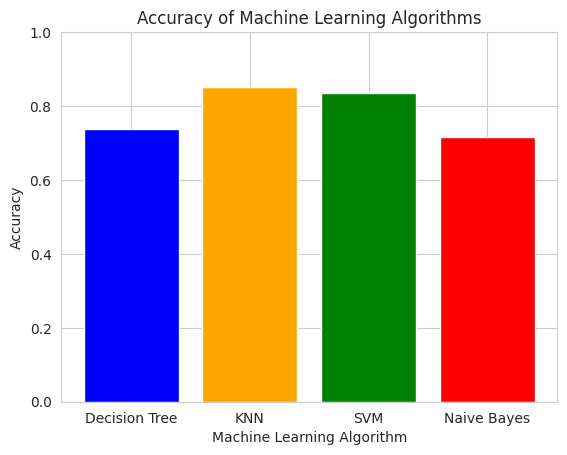

In [58]:
# Evaluate models and store results

models = {'Decision Tree': dt_pred,
          'KNN': knn_pred,
          'SVM': svm_pred,
          'Naive Bayes': nb_pred}

model_results = {}
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    model_results[name] = acc
    cm = confusion_matrix(y_test, pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Plot bar graph
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
plt.ylim([0, 1])  # Set the y-axis limit to better visualize differences
plt.show()

**Accuracies compared to other datasets**

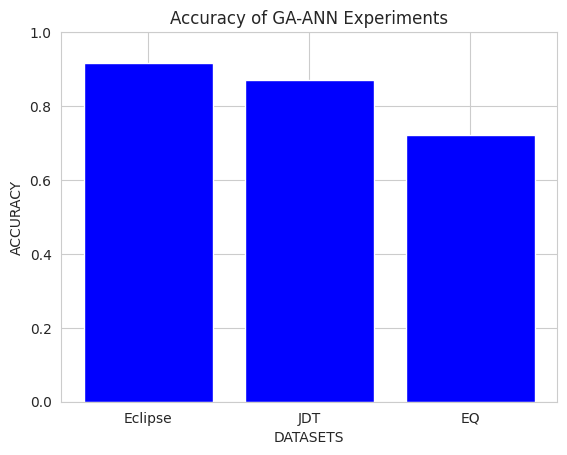

In [59]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [0.916, 0.87, 0.723]

# Plotting the bar graph
plt.bar(range(len(accuracies)), accuracies, color='blue')
plt.xlabel('DATASETS')
plt.ylabel('ACCURACY')
plt.title('Accuracy of GA-ANN Experiments')
plt.xticks(range(len(accuracies)), ['Eclipse', 'JDT', 'EQ'])
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()
